In [62]:
import copy
import pandas
import warnings
import subprocess
from matplotlib import pyplot as plt
import os
import sys

sys.path.insert(0, "../src")
# csv_orig_file = "../datasets/genny2/summary.csv"
# csv_new_file = "/tmp/summary.csv"

# csv_orig_file = "../datasets/genny2/summary.csv"

csv_orig_file = "../datasets/genny2/perf_stack.csv"
csv_new_file = "../datasets/genny2/perf_stack2.csv"

# csv_new_file = "../datasets/genny2/fle_perf_stack2_query_in.csv"


In [63]:

pd = pandas.read_csv(csv_new_file)
pd

,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
0,0,query_es2_1_1.load.inserts,query_es2_1_1,es2,load.inserts,load,load,1,1,3.633557e+06,...,1,1,52955206.0,2210569.0,3.686330e+11,0.0,100000.0,100000.0,17446120.0,6.776634e+09
1,1,query_es2_1_1.q1.reads,query_es2_1_1,es2,q1.reads,fixed_10: fixed_hf,1,1,1,4.888261e+05,...,1,1,792725.0,474729.0,5.227000e+09,0.0,10000.0,10000.0,3880000.0,3.708943e+11
2,2,query_es2_1_1.q2.reads,query_es2_1_1,es2,q2.reads,fixed_10: uar,2,1,1,6.546380e+06,...,1,1,114827600.0,454298.0,6.612500e+10,0.0,10000.0,9343.0,3611233.0,3.764426e+11
3,3,query_es2_1_1.q3.reads,query_es2_1_1,es2,q3.reads,"uar_[6,10]: uar",3,1,1,6.257408e+06,...,1,1,93391100.0,450311.0,6.306900e+10,0.0,10000.0,9368.0,3621092.0,4.422704e+11
4,4,query_es2_1_1.q4.reads,query_es2_1_1,es2,q4.reads,"uar_[6,10]: uar_alllow",4,1,1,6.948819e+06,...,1,1,93000154.0,449745.0,6.991300e+10,0.0,10000.0,9290.0,3591627.0,5.047057e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,query_es2_16_16.q2.reads,query_es2_16_16,es2,q2.reads,fixed_10: uar,2,16,16,1.318336e+07,...,16,16,283980622.0,471921.0,9.619000e+09,0.0,10000.0,9279.0,3587391.0,1.337477e+12
108,108,query_es2_16_16.q3.reads,query_es2_16_16,es2,q3.reads,"uar_[6,10]: uar",3,16,16,1.246500e+07,...,16,16,250528443.0,463076.0,8.689000e+09,0.0,10000.0,9323.0,3604058.0,1.489024e+12
109,109,query_es2_16_16.q4.reads,query_es2_16_16,es2,q4.reads,"uar_[6,10]: uar_alllow",4,16,16,1.291988e+07,...,16,16,272967513.0,460180.0,9.178999e+09,0.0,10000.0,9294.0,3593541.0,1.617128e+12
110,110,query_es2_16_16.q5.reads,query_es2_16_16,es2,q5.reads,fixed_int: int,5,16,16,6.913350e+06,...,16,16,44725159.0,4367002.0,4.867200e+10,0.0,100000.0,100000.0,38000000.0,1.829405e+12


<AxesSubplot: title={'center': 'NEW ES2 Load: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency'>

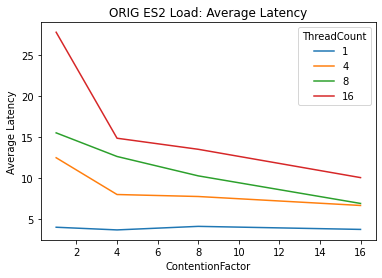

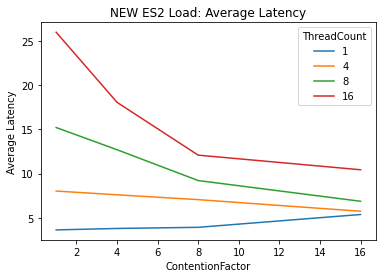

In [56]:
# Make a pivot table for average latency for load and graph it
query = "QueryNumber == 'load' & Experiment == 'es2'"

pd_orig = pandas.read_csv(csv_orig_file)

# un_pd1_orig = pd_orig.query("QueryNumber == 'load' & Experiment == 'es1'")
#un_piv_orig = un_pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd1_orig = pd_orig.query(query)
piv_orig = pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd_new = pandas.read_csv(csv_new_file)
pd1_new = pd_new.query(query)
piv_new = pd1_new.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")


# un_pd1_orig.plot(title="ORIG ES1 Load: Average Latency", ylabel="Average Latency")

piv_orig.plot(title="ORIG ES2 Load: Average Latency", ylabel="Average Latency")
piv_new.plot(title="NEW ES2 Load: Average Latency", ylabel="Average Latency")


TypeError: no numeric data to plot

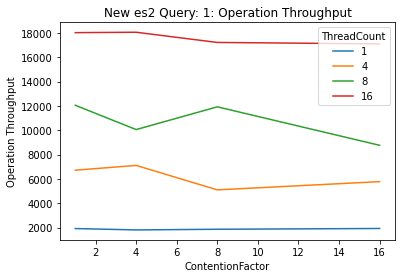

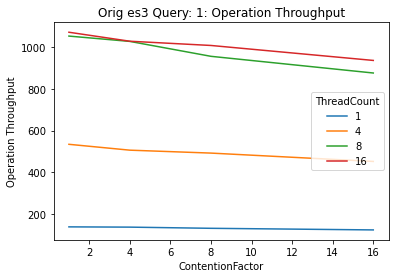

In [59]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

# plot_operation_throughput(csv_orig_file, "Orig", "load", "es1")
# plot_operation_throughput(csv_orig_file, "Orig", "load", "es2")
# plot_operation_throughput(csv_new_file, "New", "load", "es2")

plot_operation_throughput(csv_new_file, "New", "1", "es2")
plot_operation_throughput(csv_orig_file, "Orig", "1", "es3")
plot_operation_throughput(csv_new_file, "New", "1", "es3")
plot_operation_throughput(csv_new_file, "New", "5", "es2")
plot_operation_throughput(csv_new_file, "New", "6", "es2")

# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es2")
# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es3")
# plot_operation_throughput(csv_new_file, "New", "5", "es2")
# plot_operation_throughput(csv_new_file, "New", "6", "es2")

In [53]:
file_name = csv_orig_file
query = "load"
experiment = "es1"

# Make a pivot table for operation throughput for query and graph it
pd = pandas.read_csv(file_name)
pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv

#piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

ThreadCount
ContentionFactor


In [20]:
pd_orig = pandas.read_csv(csv_orig_file)

pd_orig1 = pd_orig.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_orig1["Source"] = "Orig"
#pd_orig1['Source'] = pd_orig1['QueryNumber'].map(lambda x : "Orig")
# pd_orig1.add( df2, fill_value=0 )

#pd_orig1
pd_new = pandas.read_csv(csv_new_file)
pd_new1 = pd_new.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_new1["Source"] = "New"
pd_new1

pd2 = pandas.concat([pd_orig1, pd_new1], ignore_index=True)
pd2


/tmp/ipykernel_2486705/3998469215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_orig1["Source"] = "Orig"
/tmp/ipykernel_2486705/3998469215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_new1["Source"] = "New"


,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal,Source
0,100,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,2.834882e+07,...,1,7.968172e+07,11075901.0,2.843315e+12,0.0,100000.0,100000.0,15638311.0,8.516556e+09,Orig
1,105,query_es3_1_4.load.inserts,query_es3_1_4,es3,load.inserts,load,load,1,4,8.348018e+07,...,4,3.154254e+10,15171528.0,2.170267e+12,0.0,100000.0,100000.0,15638311.0,1.693608e+10,Orig
2,110,query_es3_1_8.load.inserts,query_es3_1_8,es3,load.inserts,load,load,1,8,1.617055e+08,...,8,3.377118e+10,25603698.0,2.112300e+12,0.0,100000.0,100000.0,15638311.0,4.755534e+10,Orig
3,115,query_es3_1_16.load.inserts,query_es3_1_16,es3,load.inserts,load,load,1,16,3.363745e+08,...,16,4.269554e+10,9349045.0,2.166984e+12,0.0,100000.0,100000.0,15638311.0,1.644225e+11,Orig
4,120,query_es3_4_1.load.inserts,query_es3_4_1,es3,load.inserts,load,load,4,1,2.786549e+07,...,1,7.822590e+07,9983248.0,2.795532e+12,0.0,100000.0,100000.0,15638311.0,9.066991e+09,Orig
5,125,query_es3_4_4.load.inserts,query_es3_4_4,es3,load.inserts,load,load,4,4,6.223929e+07,...,4,1.340561e+10,14666274.0,1.581012e+12,0.0,100000.0,100000.0,15638311.0,1.618154e+10,Orig
6,130,query_es3_4_8.load.inserts,query_es3_4_8,es3,load.inserts,load,load,4,8,1.191094e+08,...,8,1.847259e+10,25703709.0,1.515554e+12,0.0,100000.0,100000.0,15638311.0,4.409853e+10,Orig
7,135,query_es3_4_16.load.inserts,query_es3_4_16,es3,load.inserts,load,load,4,16,2.493982e+08,...,16,3.178302e+10,23527687.0,1.607060e+12,0.0,100000.0,100000.0,15638311.0,1.718888e+11,Orig
8,140,query_es3_8_1.load.inserts,query_es3_8_1,es3,load.inserts,load,load,8,1,2.745365e+07,...,1,7.786848e+07,10266226.0,2.752037e+12,0.0,100000.0,100000.0,15638311.0,6.761936e+09,Orig
9,145,query_es3_8_4.load.inserts,query_es3_8_4,es3,load.inserts,load,load,8,4,4.974220e+07,...,4,7.276492e+09,13830243.0,1.250405e+12,0.0,100000.0,100000.0,15638311.0,1.454920e+10,Orig


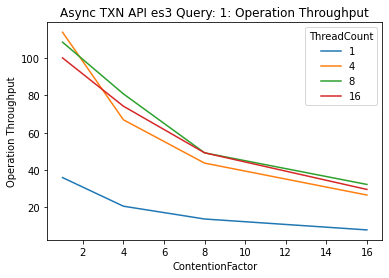

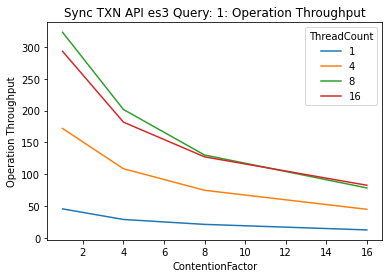

In [18]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

plot_operation_throughput(csv_orig_file, "Async TXN API", "1", "es3")
plot_operation_throughput(csv_new_file, "Sync TXN API", "1", "es3")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")
piv.plot(title="ES3 Query 2: Average Latency", ylabel="Average Latency (ms)")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv.plot(title="ES3 Query 2: Operation Throughput", ylabel="Operation Throughput")